# 02 - Data from the Web

## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-fÃ©dÃ©rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
  Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
  Answer the previous question aggregating the data by (c) country and (d) region.

Plot your data using bar charts and describe briefly what you observed.

2.Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3.Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4.Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5.Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

In [39]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import seaborn as sns
import locale
import warnings
warnings.filterwarnings("ignore")

locale.setlocale( locale.LC_ALL, 'english_USA' )

'English_United States.1252'

# Question 1

Getting 200 top-ranking universities in www.topuniversities.com.

**Make the first request:**

We read all the *get* from the website.

In [10]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508506128359')

Then, we use *json()* to parse the data.

In [11]:
rJson = r.json()

The data is transformed into a dataframe, and thus easier to manipulate.

In [12]:
ranking1Full = pd.DataFrame(rJson['data'])

In a *for* loop, for every line of the ranking, we read the url associated and get the data from this page with *BeautifulSoup*.

The number present in the html page are recorded for every line.

In [13]:
ranking1Full['In total Staff']=0
ranking1Full['International Staff']=0
ranking1Full['In total Students']=0
ranking1Full['International Students']=0

ranking200_1=ranking1Full.iloc[0:200]

for index, row in ranking200_1.iterrows():
    link = 'https://www.topuniversities.com'+ row.url
    r2 = requests.get(link)
    soup = BeautifulSoup(r2.content, 'html.parser')
    numbers=soup.find_all('', class_='number')
    if numbers!=[]:
        ranking200_1.loc[index,'In total Staff']=locale.atoi(numbers[0].string)
        ranking200_1.loc[index,'International Staff']=locale.atoi(numbers[1].string)
        ranking200_1.loc[index,'In total Students']=locale.atoi(numbers[2].string)
        ranking200_1.loc[index,'International Students']=locale.atoi(numbers[3].string)

Changing the wrong data of 1 university:

'International Students' seems like 'In total Staff'

'In total Students' seems like 'International Staff'

and the opposite.

In [85]:
a=ranking200_1.loc[189,'In total Staff']
b=ranking200_1.loc[189,'International Staff']
c=ranking200_1.loc[189,'In total Students']
d=ranking200_1.loc[189,'International Students']

ranking200_1.loc[189,'In total Staff']        =d
ranking200_1.loc[189,'International Staff']   =c
ranking200_1.loc[189,'In total Students']     =b
ranking200_1.loc[189,'International Students']=a

For each line of the 200 Universities ranking, we compute the 2 ratios.

This step is clearer on its on but it could have been done in the loop above.

In [117]:
ranking200_1['Ratio Staff/Students']=0
ranking200_1['Ratio International Students']=0

for index, row in ranking200_1.iterrows():
        ranking200_1.loc[index,'Ratio Staff/Students']=round(ranking200_1.loc[index,'In total Staff']/ranking200_1.loc[index,'In total Students'],2)
        ranking200_1.loc[index,'Ratio International Students']=round(ranking200_1.loc[index,'International Students']/ranking200_1.loc[index,'In total Students'],2)
        
for index, row in ranking200_1.iterrows():
    rank_str = str(row["rank_display"])
    str_del = "=–+"
    for char in str_del:
        rank_str = rank_str.replace(char," ")
    ranking200_1.loc[index,"rank_display"] = int(rank_str.split()[0])

Now, we are able to do new rankings depending on these ratios.

In [118]:
ranking200_1.sort_values(['Ratio Staff/Students'],ascending=0).head()
#ranking200_1.sort_values(['Ratio International Students'],ascending=0).head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url,In total Staff,International Staff,In total Students,International Students,Ratio Staff/Students,Ratio International Students
189,IN,22878,India,"<a href=""/where-to-study/asia/india/guide"" cla...","<img src=""https://www.topuniversities.com/site...",295536,190,Asia,49,None,Indian Institute of Science (IISc) Bangalore,/universities/indian-institute-science-iisc-ba...,423,4071,47,423,9.00,9.00
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...,953,350,2255,647,0.42,0.29
15,US,684,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297177,16,North America,90.4,5,Yale University,/universities/yale-university,4940,1708,12402,2469,0.40,0.20
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford,6750,2964,19720,7353,0.34,0.37
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge,5490,2278,18770,6699,0.29,0.36


We clean the dataframe and select only the wanted columns.

In the same time, we transform the string of numbers into numeric.

In [119]:
final=ranking200_1[['cc','country','region','Ratio Staff/Students','Ratio International Students']]

In [120]:
final['Ratio Staff/Students']=pd.to_numeric(final['Ratio Staff/Students'])
final['Ratio International Students']=pd.to_numeric(final['Ratio International Students'])

The indices of the maxima in *Ratio Staff/Students* and *Ratio International Students* are selected into *c1* and *c2* respectively.

In [121]:
c1=pd.DataFrame(ranking200_1['title'][ranking200_1.groupby(['country'], sort=False)['Ratio Staff/Students'].idxmax()])
c2=pd.DataFrame(ranking200_1['title'][ranking200_1.groupby(['country'], sort=False)['Ratio International Students'].idxmax()])

c1=c1.reset_index()
c2=c2.reset_index()

c1=c1.drop(c1.columns[[0]],axis=1)
c2=c2.drop(c2.columns[[0]],axis=1)

We transform the data by grouping the info by country. Then, we add the university names found with indices above to the new dataframe.

In [122]:
c=final.groupby(['country','region'], as_index=False, sort=False)

agg_c1={'Ratio Staff/Students':'max'}

final_c1 = final

final_c1 = c.agg(agg_c1)
final_c1['University']=c1

final_c1.head()

,country,region,Ratio Staff/Students,University
0,United States,North America,0.42,California Institute of Technology (Caltech)
1,United Kingdom,Europe,0.34,University of Oxford
2,Switzerland,Europe,0.19,University of Zurich
3,Singapore,Asia,0.17,"Nanyang Technological University, Singapore (NTU)"
4,Australia,Oceania,0.11,The Australian National University


Similar process with another ratio.

In [123]:
agg_c2={'Ratio International Students':'max'}

final_c2 = final

final_c2 = c.agg(agg_c2)
final_c2['University']=c2

final_c2.head()

,country,region,Ratio International Students,University
0,United States,North America,0.48,Carnegie Mellon University
1,United Kingdom,Europe,0.69,London School of Economics and Political Scien...
2,Switzerland,Europe,0.57,Ecole Polytechnique Fédérale de Lausanne (EPFL)
3,Singapore,Asia,0.28,"Nanyang Technological University, Singapore (NTU)"
4,Australia,Oceania,0.43,The University of Melbourne


We repeat the process for the classification per region.

In [124]:
r1=pd.DataFrame(ranking200_1['title'][ranking200_1.groupby(['region'], sort=False)['Ratio Staff/Students'].idxmax()])
r2=pd.DataFrame(ranking200_1['title'][ranking200_1.groupby(['region'], sort=False)['Ratio International Students'].idxmax()])

r1=r1.reset_index()
r2=r2.reset_index()

r1=r1.drop(r1.columns[[0]],axis=1)
r2=r2.drop(r2.columns[[0]],axis=1)

In [125]:
r=final.groupby(['region'], as_index=False, sort=False)

agg_r1={'Ratio Staff/Students':'max'}

final_r1 = final

final_r1 = r.agg(agg_r1)
final_r1['University']=r1

final_r1.head()

,region,Ratio Staff/Students,University
0,North America,0.42,California Institute of Technology (Caltech)
1,Europe,0.34,University of Oxford
2,Asia,9.00,Indian Institute of Science (IISc) Bangalore
3,Oceania,0.11,The Australian National University
4,Latin America,0.14,Instituto Tecnológico y de Estudios Superiores...


In [126]:
agg_r2={'Ratio International Students':'max'}

final_r2 = final

final_r2 = r.agg(agg_r2)
final_r2['University']=r2

final_r2.head()

,region,Ratio International Students,University
0,North America,0.48,Carnegie Mellon University
1,Europe,0.69,London School of Economics and Political Scien...
2,Asia,9.00,Indian Institute of Science (IISc) Bangalore
3,Oceania,0.43,The University of Melbourne
4,Latin America,0.22,Universidad de Buenos Aires (UBA)


In [185]:
#Imports for plot
import matplotlib.pyplot as plt

## Ploting data using bar charts


#### Ploting ratio of staff/students by country.

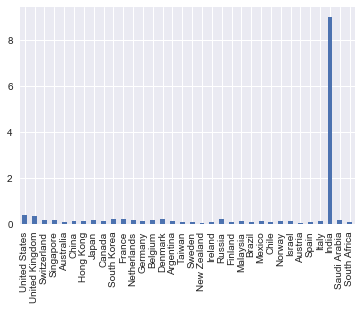

In [186]:
fig, ax = plt.subplots()
fig.canvas.draw()

final_c1['Ratio Staff/Students'].plot(kind='bar')

labels = [item for item in final_c1['country']]

ax.set_xticklabels(labels)

plt.show()

#### Ploting ratio of international students by country.

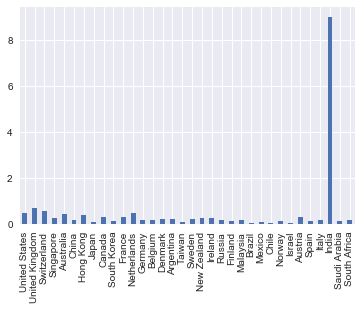

In [187]:
fig, ax = plt.subplots()
fig.canvas.draw()

final_c2['Ratio International Students'].plot(kind='bar')

labels = [item for item in final_c2['country']]

ax.set_xticklabels(labels)

plt.show()

#### Ploting ratio of staff/students by region.

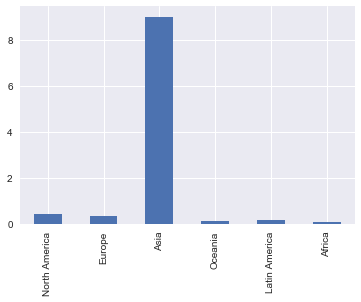

In [189]:
fig, ax = plt.subplots()
fig.canvas.draw()

final_r1['Ratio Staff/Students'].plot(kind='bar')

labels = [item for item in final_r1['region']]

ax.set_xticklabels(labels)

plt.show()

#### Ploting ratio of international students by region.

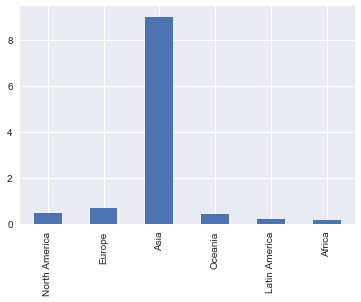

In [190]:
fig, ax = plt.subplots()
fig.canvas.draw()

final_r2['Ratio International Students'].plot(kind='bar')

labels = [item for item in final_r2['region']]

ax.set_xticklabels(labels)

plt.show()

What we see is that India is giving strange results, what makes India and Asia stand out from the rest.

# Question 2

Getting 200 top-ranking universities in  www.timeshighereducation.com.

**Make the second request:**

Here, we apply the same process for the second website.

There is no need for *BeautifulSoup* because there is no extract website to go to for data.

In [127]:
r2=requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')

In [134]:
r2Json=r2.json()

In [135]:
ranking2Full = pd.DataFrame(r2Json['data'])

In [136]:
ranking200_2=ranking2Full.iloc[0:200]

The 2 ratios computed on the first dataframe already existed here.

The first one had *%* percentage that had to be removed.

In [137]:
for index,row in ranking200_2.iterrows():
    ranking200_2.loc[index,'stats_pc_intl_students']=float(ranking200_2['stats_pc_intl_students'][index][:-1])/100

In [138]:
for index, row in ranking200_2.iterrows():
    rank_str = str(row["rank"])
    str_del = "=–+"
    for char in str_del:
        rank_str = rank_str.replace(char," ")
    ranking200_2.loc[index,"rank"] = int(rank_str.split()[0])

The second ratio was the inverse of the wanted ratio. We thus just have to transform it.

In [139]:
ranking200_2['stats_student_staff_ratio']=1/pd.to_numeric(ranking200_2['stats_student_staff_ratio'])
ranking200_2['stats_staff_student_ratio']=round(ranking200_2['stats_student_staff_ratio'],2)
ranking200_2.drop(['stats_student_staff_ratio'],1).head()

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,subjects_offered,url,stats_staff_student_ratio
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",0.38,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford,0.09
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",0.35,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge,0.09
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",0.27,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...,0.15
3,Stanford University,United States,11,Stanford University,467,3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",0.22,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university,0.13
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",0.34,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...,0.11


Once again, it is possible to class the data in the descending order of these ratio.

In [140]:
ranking200_2.sort_values(['stats_student_staff_ratio'],ascending=0).head()
#ranking200_2.sort_values(['stats_pc_intl_students'],ascending=0).head()

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url,stats_staff_student_ratio
105,Vanderbilt University,United States,0,Vanderbilt University,534,105,1060,private,96.9,37,...,173,47.7,104,53 : 47,"12,011",0.13,0.303030,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/vanderbilt-university,0.30
109,University of Copenhagen,Denmark,0,University of Copenhagen,599,109,1100,master_account,90.6,87,...,192,44.0,139,58 : 42,"30,395",0.14,0.243902,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-copenhagen,0.24
153,University of Rochester,United States,0,University of Rochester,545,153,1540,private,90.2,93,...,252,41.7,167,49 : 51,"9,636",0.29,0.232558,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-rochester,0.23
11,Yale University,United States,0,Yale University,475,12,120,private,98.4,24,...,17,86.7,6,49 : 51,"12,155",0.21,0.232558,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/yale-university,0.23
12,Johns Hopkins University,United States,0,Johns Hopkins University,478,13,130,private,98.4,23,...,16,76.1,23,52 : 48,"15,498",0.24,0.232558,"Agriculture & Forestry,Archaeology,Architectur...",/world-university-rankings/johns-hopkins-unive...,0.23


# Question 3

Mergin both dataframes.


***It is necessary to type this in the terminal for the second part to work:***

pip install fuzzywuzzy

In [141]:
from fuzzywuzzy import fuzz

For each university (*row_1*) of the first ranking, we use a function to compare with all the university names (*row_2*) of the second ranking.

We only save the index of the most important similarity between names for each *row_1*. 

There is a threshold of 90 to get ride of the universities in *row_2* not present in *row_1*.

In [142]:
positions=[]

for index_1,row_1 in ranking200_1.iterrows():
    criterias = []
    
    for index_2,row_2 in ranking200_2.iterrows():
        criteria = fuzz.partial_ratio(row_1.title,row_2['name'])
        criterias.append(criteria)
        
    criterias=pd.DataFrame(criterias)
    if int(criterias.max().values) >= 90:
            position = [index_1, int(criterias.idxmax().values)]
            positions.append(position)
            
positions=pd.DataFrame(positions)
positions.head()

,0,1
0,0,4
1,1,3
2,2,5
3,3,2
4,4,1


We get a dataframe where each university (row) has 2 indices, respectively in the first and second ranking.

Then, we use these 2 indices to combine the university's info in one dataframe.

In [143]:
ranking=pd.DataFrame([])

for index,row in positions.iterrows():
    ranking=ranking.append(pd.DataFrame(ranking200_1.loc[positions.loc[index][0]].append(ranking200_2.loc[positions.loc[index][1]])).transpose(),ignore_index=True)

ranking.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,...,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url,stats_staff_student_ratio
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,...,9,87.3,4,37 : 63,"11,177",0.34,0.114943,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...,0.11
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,...,5,89.1,2,42 : 58,"15,845",0.22,0.133333,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university,0.13
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,...,2,84.2,9,None,"20,326",0.26,0.11236,"Agriculture & Forestry,Archaeology,Art, Perfor...",/world-university-rankings/harvard-university,0.11
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,...,4,90.3,1,31 : 69,"2,209",0.27,0.153846,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...,0.15
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,...,3,87.8,3,45 : 55,"18,389",0.35,0.0917431,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge,0.09


In [144]:
ranking=ranking[['title','rank_display','rank','country','region','Ratio Staff/Students','Ratio International Students']]

In [145]:
ranking.columns=['Name','Rank: "Top Universities"','Rank: "World Universities Rankings"','Country','Region','Ratio Staff/Students','Ratio International Students']

In [146]:
ranking.head() #Preview of our final ranking dataframe.

,Name,"Rank: ""Top Universities""","Rank: ""World Universities Rankings""",Country,Region,Ratio Staff/Students,Ratio International Students
0,Massachusetts Institute of Technology (MIT),1,5,United States,North America,0.27,0.34
1,Stanford University,2,3,United States,North America,0.27,0.23
2,Harvard University,3,6,United States,North America,0.19,0.23
3,California Institute of Technology (Caltech),4,3,United States,North America,0.42,0.29
4,University of Cambridge,5,2,United Kingdom,Europe,0.29,0.36


# Question 4

Analyzing ranking information. 

Looking for some correlation between data 

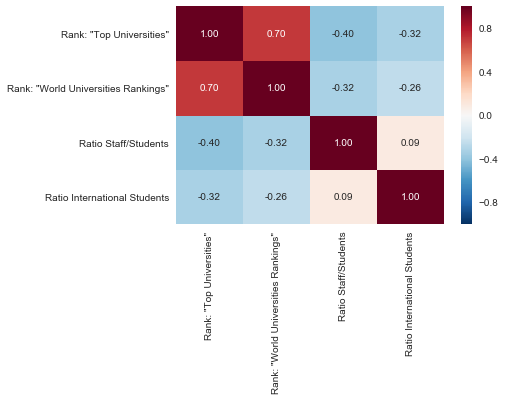

In [147]:
for col in ranking.columns:
    if (col=="Name" or col=="Country" or col=="Region"):
        ranking[col]=ranking[col].astype(str)
    elif(col=="Rank: \"Top Universities\"" or col=="Rank: \"World Universities Rankings\""):
        ranking[col]=ranking[col].astype(int)
    else:
        ranking[col]=ranking[col].astype(float)
        
ranking.corr()
%matplotlib inline
sns.heatmap(ranking.corr(), annot=True, fmt=".2f")

We have compared both rankings and mainly got the correlation between the staff/students and the ratio of international student.

We can observe that there are many similarities between rankings positions, getting a high correlation comparing both.

The other results only show a weak inverse correlation. 


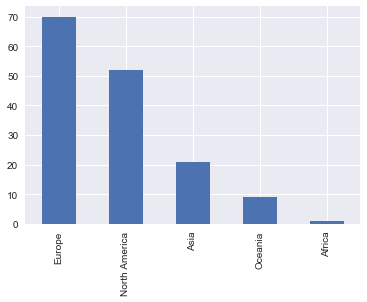

In [155]:
ranking['Region'].value_counts().plot(kind = "bar")

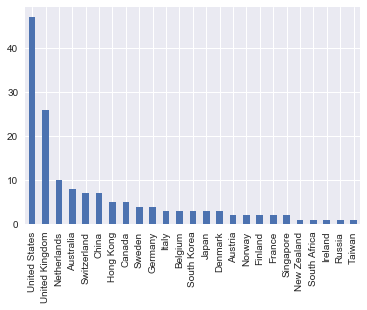

In [156]:
ranking['Country'].value_counts().plot(kind = "bar")

Now, we see universities by region in the first plot, most of the top 200 are in Europe. 
But from the second plot what we can see is that United States stats out above the rest.

# Question 5

Searching for the best university using both ranks.

Our strategy is to get a new rank ordering universities by adding their possition from both rankings so that the one with the lowest value is the one who got the best review.

In [152]:
#Adding results
ranking['Result position']=ranking["Rank: \"Top Universities\""] + ranking["Rank: \"World Universities Rankings\""]

#Getting the top ones
ranking.sort_values(['Result position'],ascending=1).head()

,Name,"Rank: ""Top Universities""","Rank: ""World Universities Rankings""",Country,Region,Ratio Staff/Students,Ratio International Students,Result position
1,Stanford University,2,3,United States,North America,0.27,0.23,5
0,Massachusetts Institute of Technology (MIT),1,5,United States,North America,0.27,0.34,6
3,California Institute of Technology (Caltech),4,3,United States,North America,0.42,0.29,7
4,University of Cambridge,5,2,United Kingdom,Europe,0.29,0.36,7
5,University of Oxford,6,1,United Kingdom,Europe,0.34,0.37,7



This shows that the best university is **Stanford University**